## Domain len distribution

In [22]:
import sys
import pandas as pd 
sys.path.append('../')

from utils import read_original_data
data = None
for part in ['dev', 'train', 'test']:
    df = read_original_data('../../shared_insync/emb2PFam/data/Random_data/', part)
    if data is None:
        data = df
    else:
        data = pd.concat((data, df))
    
data

,family_id,sequence_name,family_accession,aligned_sequence,sequence
0,zf-HYPF,Q0PAP5_CAMJE/108-140,PF07503.12,.CKECKK.EFFDEKN...PRFLYPFITCTHCGPRFSII,CKECKKEFFDEKNPRFLYPFITCTHCGPRFSII
1,GST_N_4,A1DCP8_NEOFI/25-129,PF17172.4,PFVTKLEARLRFGNIP...YRTEQGAI.....PKAPRGKVPYV......,PFVTKLEARLRFGNIPYRTEQGAIPKAPRGKVPYVSIQDGEQPPQT...
2,LacAB_rpiB,R5V2D8_9FIRM/3-139,PF02502.18,IWIGCDHAGYPMKLEV....LA.ML.......QE...Q.GY...T....,IWIGCDHAGYPMKLEVLAMLQEQGYTVEDMGCDGSRADYPEIAAAV...
3,Lipase_GDSL,O04702_DAUCA/33-364,PF00657.22,IFNFGDANSDTGAFAAWFFGNPPFFGQSYFNGSAGRVSD..........,IFNFGDANSDTGAFAAWFFGNPPFFGQSYFNGSAGRVSDGRLLIDF...
4,TilS_C,TILS_BURPS/408-482,PF11734.8,LRACAR...AGGERMRT..RQ....GGPGRTLKNLFQERGVPAWQR...,LRACARAGGERMRTRQGGPGRTLKNLFQERGVPAWQRDVPLLYVGE...
...,...,...,...,...,...
12570,DUF3755,B9SW75_RICCO/192-225,PF12579.8,TMQLQENIGLLCQTRDNILKIMNE.......MKD.MPELMKR,TMQLQENIGLLCQTRDNILKIMNEMKDMPELMKR
12571,YjbR,C3PEH2_CORA7/25-116,PF04237.13,MELPG.AA..LTHP.F...G..P.....DWDVF.....KVR....G...,MELPGAALTHPFGPDWDVFKVRGKVFLLLTAVTGKHQAILKAEPLD...
12572,TetR_C_33,A0A0A6UEJ9_ACTUT/93-194,PF13305.6,LPAAAGAYVRYVARTGAGLPV.IY.....AAELYQ..............,LPAAAGAYVRYVARTGAGLPVIYAAELYQVEDDARREHTRALMTTM...
12573,FIST_C,C6BU94_DESAD/212-349,PF10442.9,AFSIYREVI.....................REHSGKYITPENFSHI...,AFSIYREVIREHSGKYITPENFSHIAMSYPFGISSMCSDPIVRDPV...


proportion len<512 0.98, len<256 0.85


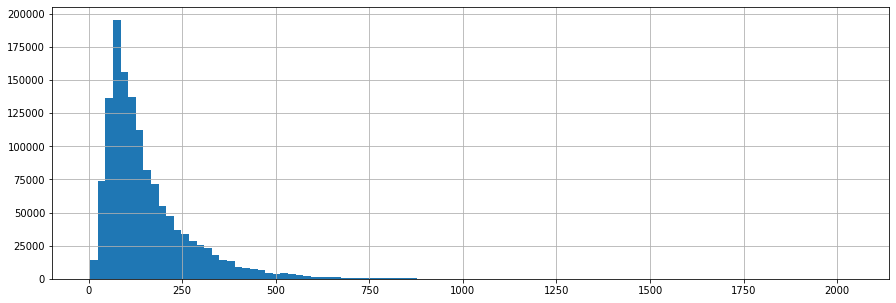

In [23]:
data['len'] = data.sequence.str.len()
data.len.hist(bins=100, figsize=(15, 5))
print(f'proportion len<512 {(data.len<512).sum()/len(data):.2f}, len<256 {(data.len<256).sum()/len(data):.2f}')

## Pfam seed vs full

In [24]:
pfam_full = pd.read_csv("../../shared_insync/emb2PFam/data/Pfam-A_Full+Seed.csv")
pfam_full

pfam100 = pd.read_csv("../../shared_insync/emb2PFam/data/Pfam_subset/Pfam100_train.csv")

In [25]:
k = 80863 # take one with some length. 

# Pfam reports 4 families (mur ligase start & middle, alinine racemase C & N)
# https://www.ebi.ac.uk/interpro/protein/unreviewed/F9D487/

pfam100.iloc[80863] # only reports Ala_racemase_C as one of the 100 most common fammilies.

family_id                                              Ala_racemase_C
sequence_name                                    F9D487_PREDD/699-822
family_accession                                           PF00842.21
domain_sequence     VSTLKTTILQLREVKAGDTVGYSRKGAIARDSLIAAIPIGYADGLN...
sequence            MTYTIEKVTTLIGARRYGDRDANVGFLLTDSRSLCFPEETLFFALK...
start                                                           698.0
end                                                             822.0
Name: 80863, dtype: object

In [26]:
import sys 
sys.path.append("../")
from utils import read_original_data

data = read_original_data("../../shared_insync/emb2PFam/data/Random_data/", 'train')
data = pd.concat((data, read_original_data("../../shared_insync/emb2PFam/data/Random_data/", 'dev')))
data = pd.concat((data, read_original_data("../../shared_insync/emb2PFam/data/Random_data/", 'test')))


In [27]:
data[data.sequence_name.str.contains('F9D487_PREDD')] # same as pfam100

,family_id,sequence_name,family_accession,aligned_sequence,sequence
13453,Ala_racemase_C,F9D487_PREDD/699-822,PF00842.21,VSTLKTTILQLREV.KAGD.T..VGYSRKG.AIAR.D.SLIAAIPI...,VSTLKTTILQLREVKAGDTVGYSRKGAIARDSLIAAIPIGYADGLN...


In [29]:
pfam_full[pfam_full.PID == 'F9D487_PREDD'] # all annotations are there, only one is seed    

,PID,Inicio,Fin,PF,Seed
52235,F9D487_PREDD,699,822,PF00842,1.0
1442906,F9D487_PREDD,468,690,PF01168,0.0
1442907,F9D487_PREDD,23,103,PF01225,0.0
1442908,F9D487_PREDD,113,300,PF08245,0.0


## PFam100 v32


In [7]:
import pandas as pd
data = pd.read_csv("../Pfam100v32_train.csv")
data.groupby("PID").count().sort_values(by="Seed")

,Inicio,Fin,PF,Seed
PID,,,,
36010_ASFM2,1,1,1,1
PUTR_BACSU,1,1,1,1
PURL_WOLSU,1,1,1,1
PURL_THEEB,1,1,1,1
PURL_SYNJB,1,1,1,1
...,...,...,...,...
E2A377_CAMFO,14,14,14,14
MKKA_DICDI,17,17,17,17
UTP13_YEAST,17,17,17,17


### Overlap in seed-full

In [59]:
import pandas as pd 
import numpy as np

dataset = pd.concat((pd.read_csv("../../shared_insync/emb2PFam/data/Pfam_subset/Pfam100v32_train.csv"),
pd.read_csv("../../shared_insync/emb2PFam/data/Pfam_subset/Pfam100v32_dev.csv"),
pd.read_csv("../../shared_insync/emb2PFam/data/Pfam_subset/Pfam100v32_test.csv")))

#dataset = pd.read_csv("../../shared_insync/emb2PFam/data/Pfam_subset/Pfam100v32_test.csv")

matching_ind = []

for pid in dataset.PID.unique():
    seeds = dataset[(dataset.PID==pid) & (dataset.Seed==1)]
    not_seeds = dataset[(dataset.PID==pid) & (dataset.Seed==0)]
    for k in range(len(not_seeds)):
        item_not_seed = not_seeds.iloc[k]
        matching_seed = seeds[seeds.PF == item_not_seed.PF]
        # Check if matching fams are overlaping in inicio fin
        for k in range(matching_seed.shape[0]):
            if (np.abs(matching_seed.iloc[k].Inicio - item_not_seed.Inicio)/matching_seed.iloc[k].Inicio < 0.1) and (np.abs(matching_seed.iloc[k].Fin - item_not_seed.Fin)/matching_seed.iloc[k].Fin < 0.1):
                matching_ind.append(item_not_seed.name)
                break 

     
print("Number of seeds", dataset[dataset.Seed==1].shape[0])
print("Number of not seeds", dataset[dataset.Seed==0].shape[0])
print("Not seed that matches with seeds up to 10% error", len(matching_ind))


Number of seeds 108434
Number of not seeds 37867
Not seed that matches with seeds up to 10% error 15296


### Adding less frequent domains
In this first stage, we add families that are unfrequent but have a number of seed and full
(predicted by HMM) samples

In [1]:
"""Generación de dataset pfam 100 con particiones random, para verificar que funcione el approach"""
import pandas as pd
from Bio import SeqIO

DEVICE = "cuda"
EMB2PFAM_PATH = "../../shared_insync/emb2PFam/"
DATA_DIR = f"{EMB2PFAM_PATH}/data/"
PFAM_FULL_PATH = "../../shared_insync/emb2PFam/data/Pfam-A_Full+Seed_v32.csv"

# complete protein sequences
sequences = {}
for item in SeqIO.parse(f"{DATA_DIR}Complete_sequences/Pfam-A_seed_completeseq_v32.fasta", "fasta"):
    sequences[item.name.split("|")[0]] = str(item.seq)

# seed+full domain tags
dataset = pd.read_csv(PFAM_FULL_PATH)
print(dataset.shape)

# Pfam100: subset of 100 most common families from seed entries
categories_pfam100 = dataset[dataset.Seed==1].groupby("PF")["PF"].count().sort_values(ascending=False)[:100].index.tolist()



(2649767, 5)


In [2]:
from tqdm import tqdm
# The 100 least common have only 1 sample in seed. Drop all families that have very few seed and full examples

categories = dataset.groupby("PF")["PF"].count().sort_values(ascending=True)


pfam_unfreq = []
for PF in categories[categories > 20].index:
    sample = dataset[dataset.PF == PF]
    # discard samples with too few seeds or too few full
    if sample.Seed.sum() < 10:
        continue
    if (sample.Seed==0).sum() < 10:
        continue

    if len(pfam_unfreq) > 100:
        break
    pfam_unfreq.append(PF)
    
dataset[dataset.PF.isin(pfam_unfreq)].groupby("PF")["PF"].count()

PF
PF00232    24
PF00295    23
PF00519    21
PF01001    23
PF01050    22
           ..
PF18650    28
PF18779    21
PF18837    26
PF18842    24
PF18868    27
Name: PF, Length: 101, dtype: int64

In [3]:
dataset_unfrequent = dataset[(dataset.PF.isin(pfam_unfreq))]
print(dataset_unfrequent.shape)

with open("categories_unfreq.txt", "w") as fout:
    for item in pfam_unfreq:
        fout.write(item + "\n")

dataset_unfrequent.groupby("PF")["PF"].count().sort_values(ascending=False)

(2504, 5)


PF
PF09312    28
PF18650    28
PF07304    28
PF07022    28
PF10412    28
           ..
PF00519    21
PF18779    21
PF17170    21
PF03291    21
PF18188    21
Name: PF, Length: 101, dtype: int64

In [8]:
categories = pfam_unfreq + categories_pfam100
len(set(categories))

201

In [9]:
from sklearn.model_selection import train_test_split

dataset_pfam200 = dataset[dataset.PF.isin(categories)]
dataset_pfam200



,PID,Inicio,Fin,PF,Seed
4414,A9G0B1_SORC5,180,276,PF01367,1.0
4415,C1A3H5_GEMAT,186,282,PF01367,1.0
4416,W0RH33_9BACT,192,288,PF01367,1.0
4417,U5Q619_9BACT,175,266,PF01367,1.0
4418,G2LJI6_CHLTF,177,273,PF01367,1.0
...,...,...,...,...,...
2648819,C3ZX57_BRAFL,34,104,PF13927,0.0
2649392,G3PTH7_GASAC,111,185,PF13927,0.0
2649441,H2KU22_CLOSI,108,182,PF13927,0.0
2649465,T1IHT4_STRMM,135,212,PF13927,0.0


In [13]:
with open("categories_pfam200.txt", "w") as fout:
    for item in categories:
        fout.write(item + "\n")